

# Project: Investigate a Dataset - [TMDB 5000 Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information such as budget, revenue, and genre for five thousand movies.Each of these categories has its own column. The categories that I chose to focus on were: budget, genres, popularity, production coutries, release date, revenue, runtime, languages, and movie title. 

### Question(s) for Analysis
> For this project I will be answering three questions involving revenue and what attributes could be a contributing factor in making a succesful movie.

>First, is there a strong relationship between revenue and budget?

>Second, how much does runtime effect the revenue of a film?

> Third, what times during the year does the movie business bring in the most profit? 

>I will state now that due to the lack of access to a computer with sufficient memory and computing power, this project was done in google colab. So I suggest running it there so as to avoid any issues.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import decimal

import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>This code below grabs the data set from my google drive. In order for me to grab the data, Google needs authentication. Since my computer has limited space, I needed to find other ways to access the data set to complete this project.




In [3]:
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials


#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)


### Data Cleaning
> Now I will read in the data set using pandas.

In [4]:
#fileDownloaded = drive.CreateFile({"id":"11QY0F4CtiKwuglChJwl8fUbBdpBdQakS"})

#fileDownloaded.GetContentFile("tmbd_5000_movies.csv")


df = pd.read_csv("tmdb-movies.csv")

df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



> First, I'm going to see how many movies I'm working with by using the shape() command.

In [5]:
df.shape

(10866, 21)

> So, there are 4803 movies in the data set below. Next, I need to see if there are any missing values. Lastly, I need to look at what the data types are for each column of data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> Now I am going to drop whatever columns I dont need from my data set and remove any missing values.


In [7]:
df.drop(['homepage', 'keywords','id', 'original_title', 'overview', 'production_companies', 'tagline', "vote_average", 'vote_count'], axis=1, inplace=True)
df.dropna( inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

>In this section of the project I used exploratory data analysis to answer the questions I listed earlier. 





>Now that all missing values have been removed, I can perform my data analysis. I'll start by checking the correlation between revenue, runtime and budget.


In [8]:
print(df.runtime.corr(df.revenue))
df.budget.corr(df.revenue)


#df.genres.value_counts()



0.164159466758


0.73444294846625058

>Based on the code above it appears that there is a weak positive relationship between runtime and revenue. Despite this, I will run some graphs and see what I get. However, it appears that there is quiet a positive relationship between budget and revenue.

> So for fun I picked two of my favorite genres and two that I think generally do well at the box office and see how 
> their runtime and revenue compare to each other.

Text(0.5,0.98,'Revenue/Runtime Relation by Genre')

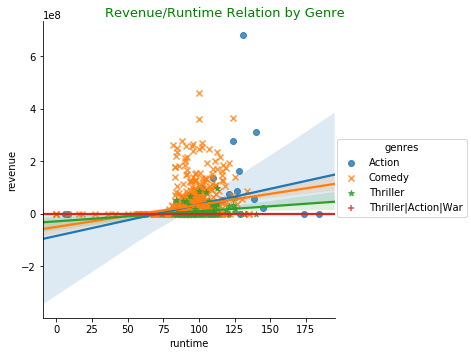

In [20]:
my_graph=sb.lmplot(x='runtime', y='revenue', markers=['o', 'x', '*', '+'], hue='genres',
           data=df.loc[df['genres'].isin(['Thriller', 'Comedy', 'Action', 'Thriller|Action|War'])],
           fit_reg=True
          )

# Access the figure
fig = my_graph.fig 

# Add a title to the Figure
fig.suptitle("Revenue/Runtime Relation by Genre", fontsize=13, color= "Green")

> And as you can see it looks like action movies have landed the highest amount of revenue but it appears to be a hit or miss on whether it will be a huge success or not (which may explain why there appears to be less of them on this graph. The budgets probably have a role to play in that as well). Comedy movies appear to be more consistant and their runtime seems to stay within a hour fifteen minute and two hour runtime range.They also take up more of the graph than any other genre I chose.

### Research Question 1: Is there a correlation between movie length and Revenue?

>The code below is just being used to convert the runtime of the movies from minutes to hours.

>After that, I simply create simple bar chart using runtime as my x-axis and revenue as my y-axis.

Text(0.5,1,'Revenue in Relation to Runtime')

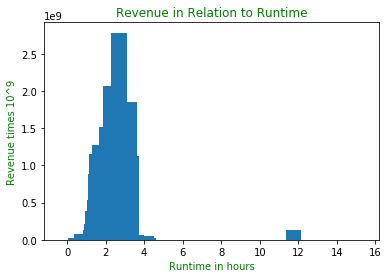

In [15]:
plt.bar(df['runtime'].div(60), df['revenue']);
plt.xlabel('Runtime in hours', color="Green")
plt.ylabel('Revenue times 10^9', color="Green")
plt.title("Revenue in Relation to Runtime", color="Green")



>As you can see from this graph, the movies producing the most revenue are within the range of two to three and a half hours.

## Research Question 2: Is there correlation between the release dates and the amount of revenue?

>The process here is similar to the code for the last graph, but in order for me to look at the revenue for each month, I used the Datetime index function.

Text(0.5,1,'Revenue in Relation to Seasons')

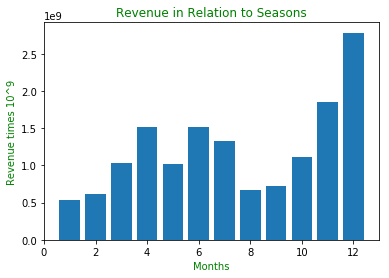

In [22]:
months=pd.DatetimeIndex(df['release_date']).month
plt.bar(months, df['revenue']);
plt.xlabel('Months', color="green")
plt.ylabel("Revenue times 10^9", color="green")
plt.title("Revenue in Relation to Seasons", color="green")

>It looks as though most of the profit generated in the movie making industry occurs during the holidays, spring break, and summer.

## Research Question 3: Is there a correltation between budget and revenue?


>First I call in the LinearRegression function from the SKLearn so that I can create a linear model and create a scatter plot of my budget and revenue data. 


>Then I assigned my x and y values so that I can use them in my model. Line seven of my code is taking the x and y values and creating coeffecients and an intercept for my model. 


>The predict function below is just creating y values based off the model I created and is using x values as its input. After that I just simply graphed it.

Text(0.5,1,'Relationship Between Budget and Revenue')

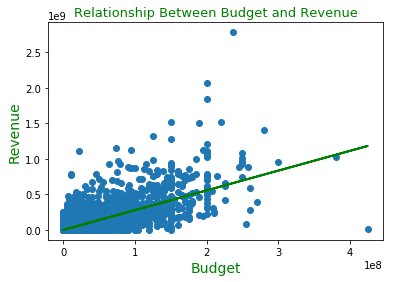

In [26]:
model=LinearRegression()
plt.scatter(df['budget'], df['revenue'])

x=df['budget'].values.reshape(-1,1)
y=df['revenue'].values.reshape(-1,1)

model.fit(x,y)


y_pred=model.predict(x)

plt.plot(x, y_pred, color='green', linewidth=2);
plt.xlabel('Budget', color="green", fontsize=14)
plt.ylabel("Revenue", color='green', fontsize=14)
plt.title("Relationship Between Budget and Revenue", color="green", fontsize=13)


>As you can see, it appears that there is a strong positive correlation between budget and revenue for movies. This could be due to larger budgets allowing for more flexibility and more resources to be allocated towards advertising, cast, CGI, etc.

<a id='conclusions'></a>
## Conclusions

>In conclusion, it appears that there are relationships between revenue and the three components I listed above. However, this does not infer causation and I am sure there is more work that could be done to explore this relationship further. If I were to dive deeper into this data set and further explore other possible relationships, I would dig into the relationship between the budget and the revenue of a film. My reasoning for this is because there are movies with a big budget that do not succeed. This leads me to believe that there is a different component or components that could prove to be more useful in determining whether a movie is a "blockbuster" or not. Another aspect of the data set I would like to explore would be what influence the cast of a film has on the overall success of the film and its ratings by critics.

>There are of of course limitations to the work I have done. First of them being my lack of knowledge and skill at this point of the program, for I have a novice understanding in a handfull of libraries. I also have restrictions on what details the data set can provide on the films listed. I would certainly like to gather data from other film critique sites and see how they compare.
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!